In [33]:
# Importing required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
f=pd.read_csv("iris.data",header=None,
              names=["sepal_len","sepal_wid","petal_len","petal_wid","species"])
f.head()

,sepal_len,sepal_wid,petal_len,petal_wid,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# checking for null values
f.isnull().sum()

sepal_len    0
sepal_wid    0
petal_len    0
petal_wid    0
species      0
dtype: int64

### visualization

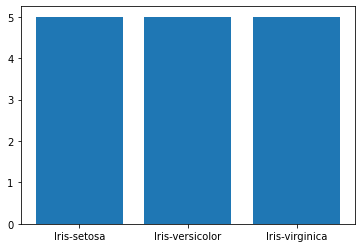

In [4]:
plt.bar(f["species"],height=5);

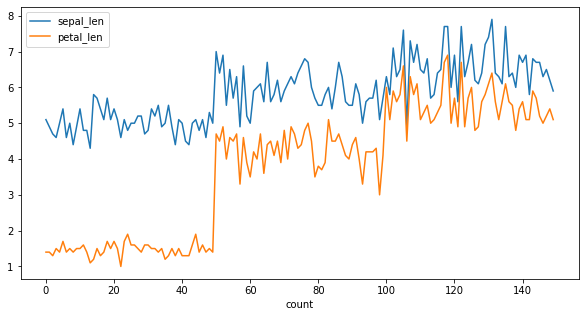

In [5]:
f["sepal_len"].plot(figsize=(10,5),legend=True);
f["petal_len"].plot(figsize=(10,5),legend=True);
plt.xlabel("count");

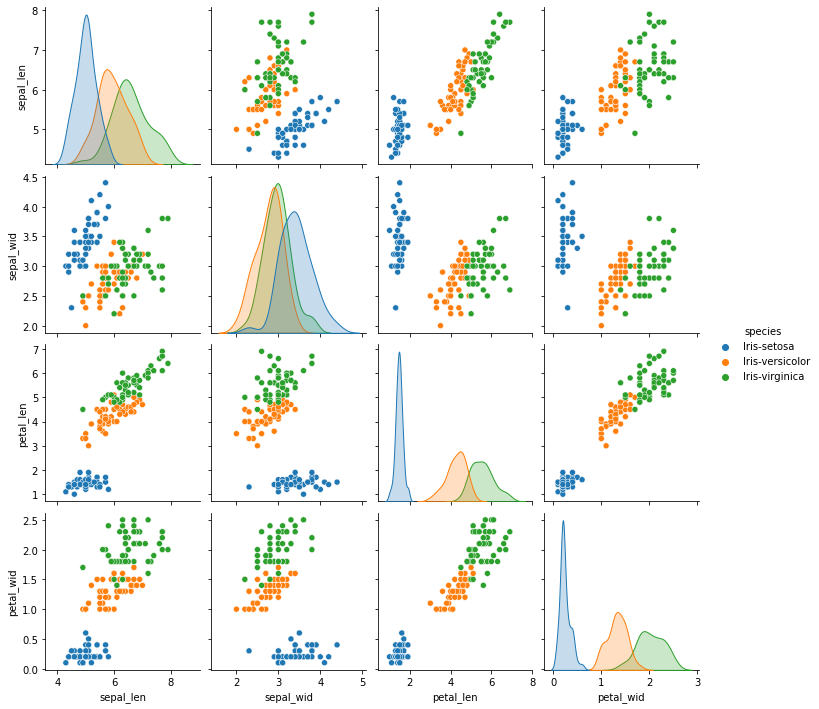

In [6]:
sns.pairplot(f,hue="species");

In [7]:
f.columns

Index(['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'species'], dtype='object')

### Handling the outliers

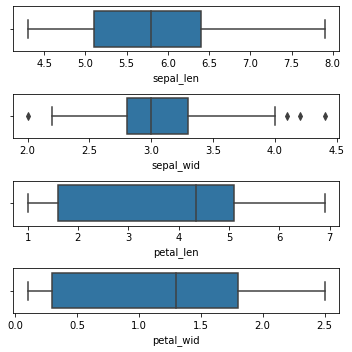

In [9]:
fig,ax=plt.subplots(4,figsize=(5,5))
plt1=sns.boxplot(f.sepal_len,ax=ax[0])
plt2=sns.boxplot(f.sepal_wid,ax=ax[1])
plt3=sns.boxplot(f.petal_len,ax=ax[2])
plt4=sns.boxplot(f.petal_wid,ax=ax[3])
plt.tight_layout()

In [10]:
# we found the outlier in the sepal width

In [11]:
#Handling Outliers
Q1=f['sepal_wid'].quantile(q=0.25)
Q3=f['sepal_wid'].quantile(q=0.75)
iqr=Q3-Q1
low=Q1-1.5*iqr
high=Q3+1.5*iqr
f.loc[(f.sepal_wid<low)|(f.sepal_wid>high),'sepal_wid']=f.sepal_wid.mean()

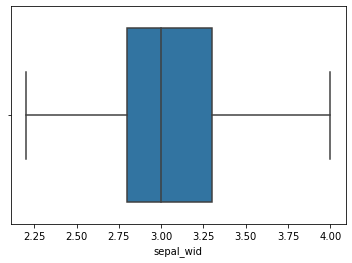

In [12]:
sns.boxplot(f.sepal_wid);

### Handling the chategorical data

In [13]:
f.head(2)

,sepal_len,sepal_wid,petal_len,petal_wid,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [14]:
f["species"],x=pd.factorize(f["species"])

In [15]:
f.sample(3)

,sepal_len,sepal_wid,petal_len,petal_wid,species
63,6.1,2.9,4.7,1.4,1
18,5.7,3.8,1.7,0.3,0
104,6.5,3.0,5.8,2.2,2


### Data standardization

In [16]:
from sklearn.preprocessing import StandardScaler
c=["sepal_len","sepal_wid","petal_len","petal_wid"]
scaler = StandardScaler()
for col in c:
    f[col]=scaler.fit_transform(f[[col]])

In [17]:
f.head()

,sepal_len,sepal_wid,petal_len,petal_wid,species
0,-0.900681,1.190590,-1.341272,-1.312977,0
1,-1.143017,-0.096367,-1.341272,-1.312977,0
2,-1.385353,0.418415,-1.398138,-1.312977,0
3,-1.506521,0.161024,-1.284407,-1.312977,0
4,-1.021849,1.447981,-1.341272,-1.312977,0


### LogisticRegression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [19]:
X=f.drop("species",axis=1)
y=f["species"]

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
lr=LogisticRegression(random_state=42,solver="lbfgs",multi_class="multinomial")
lr.fit(X_train,y_train)
y_test_pred=lr.predict(X_test)
y_train_pred=lr.predict(X_train)
print("r2_score_train:",r2_score(y_train,y_train_pred))
print("r2_score_test:",r2_score(y_test,y_test_pred))

r2_score_train: 0.9396074484146955
r2_score_test: 1.0


In [21]:
#KFold for LogisticRegression
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
score_train=cross_val_score(lr,X_train,y_train,cv=fold)
score_test=cross_val_score(lr,X_test,y_test,cv=fold)

print(score_train)
print(score_test)
print()
acc_score_train=np.mean(abs(score_train))
acc_score_test=np.mean(abs(score_test))

print("acc_score_train :",acc_score_train)
print("acc_score_test :",acc_score_test)

[1.         0.91666667 0.95833333 1.         0.875     ]
[0.83333333 0.83333333 0.83333333 0.83333333 1.        ]

acc_score_train : 0.95
acc_score_test : 0.8666666666666668


### GridSearchCV

In [22]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [23]:
fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

solver=['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
max_iter=[100,150,200]
C=[1.0,0.01,0.001,10]
verbose=[0,1,2]
hyper_para=dict(solver=solver,max_iter=max_iter,C=C)
gs_model=GridSearchCV(estimator=LogisticRegression(),param_grid=hyper_para,scoring='accuracy',cv=fold)
gs_model.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.01, 0.001, 10],
                         'max_iter': [100, 150, 200],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='accuracy')

In [24]:
print(gs_model.best_score_)
print(gs_model.best_params_)
print(gs_model.best_estimator_)

0.95
{'C': 1.0, 'max_iter': 100, 'solver': 'newton-cg'}
LogisticRegression(solver='newton-cg')


In [25]:
lr_new=LogisticRegression(C=1,max_iter=100,solver='newton-cg').fit(X_train,y_train)
y_pred=lr_new.predict(X_test)

In [26]:
lr_score=accuracy_score(y_test,y_pred)
print('train:',lr_new.score(X_train,y_train))
print('test:',lr_score)

train: 0.9583333333333334
test: 1.0


### KNN as classifier

In [27]:
X = f.iloc[:, :-1].values
y = f.iloc[:, 4].values

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)
classifier = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777
